In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

dating_df = pd.read_csv("data/Speed Dating Data.csv")

In [2]:
dating_df['match_es'].isnull().sum()

1173

In [3]:
new_data=dating_df.dropna(subset=['attr', 'sinc', 'intel', 'fun', 'amb', 'shar','dec'])

In [14]:
# data seperation

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

train, test = train_test_split(new_data, test_size=0.25,random_state=0)
X=['attr', 'sinc', 'intel', 'fun', 'amb', 'shar']
Y=['dec']


#print(train)
#print(test)

train_X=train[X]
train_Y=train['dec']

test_X=test[X]
test_Y=test['dec']

features_one = train_X.values
target = train_Y.values

x=[]
y=[]

# Decision Tree

In [5]:
tree_model = DecisionTreeClassifier()
clf = tree_model.fit(features_one, target)
dt_prediction = tree_model.predict(test_X)

accuracy = metrics.accuracy_score(dt_prediction, test_Y)
x.append("Decision")
y.append(accuracy)
print('The accuracy of the Decision Tree is',accuracy)

The accuracy of the Decision Tree is 0.6659090909090909


In [7]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
dot_data = export_graphviz(clf, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [ ]:
plt.plot()

# KNN

In [6]:
# KNN

from sklearn import neighbors

knn = neighbors.KNeighborsClassifier()
knn.fit(features_one, target)

accuracy = knn.score(test_X,test_Y)
x.append("KNN")
y.append(accuracy)

print('The accuracy of the KNN is',accuracy)

The accuracy of the KNN is 0.7238636363636364


# SVM - linear

In [7]:
# SVM - linear

from sklearn import svm
svc = svm.SVC(kernel='linear')
svc.fit(features_one, target)

accuracy = svc.score(test_X, test_Y)
x.append("SVM-linear")
y.append(accuracy)

print('The accuracy of the SVM_linear is',accuracy)

The accuracy of the SVM_linear is 0.7488636363636364


# SVM - rbf

In [8]:
# SVM - RBF

from sklearn import svm
svc_r = svm.SVC(kernel='rbf')
svc_r.fit(features_one, target)

accuracy = svc_r.score(test_X, test_Y)
x.append("SVM-rbf")
y.append(accuracy)

print('The accuracy of the SVM_rbf is',accuracy)

The accuracy of the SVM_rbf is 0.7522727272727273


# K-means clustering

In [15]:
# K-means clustering

from sklearn import cluster, datasets
k_means = cluster.KMeans()
k_means.fit_predict(features_one,target)

k_means.score(test_X,test_Y)

-14402.297640717468

# Grid-search

In [9]:
# Grid-search

from sklearn import svm, grid_search
gammas = np.logspace(-6,-1,10)
svc_g = svm.SVC()
clf = grid_search.GridSearchCV(estimator=svc_g, param_grid=dict(gamma = gammas), n_jobs=-1)
clf.fit(features_one, target)

accuracy = clf.score(test_X, test_Y)
x.append("Grid-search")
y.append(accuracy)

print('The accuracy of the Grid-search is',accuracy)

C:\Users\cnlab\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\cnlab\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


The accuracy of the Grid-search is 0.7551136363636364


# Cross-validated estimators

In [10]:
# Cross-validated estimators

from sklearn import linear_model, datasets
lasso = linear_model.LassoCV()
lasso.fit(features_one, target)

accuracy = lasso.score(test_X, test_Y)
x.append("Cross-val")
y.append(accuracy)

print('The accuracy of the Cross-validated estimators is',accuracy)

The accuracy of the Cross-validated estimators is 0.2810470504976944


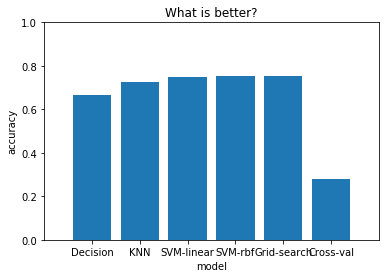

In [12]:
n_groups = len(x)
index = np.arange(n_groups)

plt.bar(index, y, tick_label = x, align='center')

plt.xlabel('model')
plt.ylabel('accuracy')
plt.title('What is better?')
plt.xlim(-1, n_groups)
plt.ylim(0,1)
plt.show()

# Decision Tree with KFold

In [18]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kf = KFold(n_splits=4)
#kf.get_n_splits(new_data)

print(kf)
#print(new_data)

model=DecisionTreeClassifier()

data_X=new_data[X]
data_Y=new_data[Y]

scores=np.zeros(4)
for i, (train, test) in enumerate(kf.split(new_data)):
    train_data_X = np.array(data_X)[train]
    train_data_Y = np.array(data_Y)[train]
    test_data_X = np.array(data_X)[test]
    test_data_Y = np.array(data_Y)[test]
    model.fit(train_data_X, train_data_Y)
    prediction=model.predict(test_data_X)
    scores[i] = metrics.accuracy_score(prediction, test_data_Y)

#print(scores)

cross_val_score(model,data_X,data_Y,cv=kf)

KFold(n_splits=4, random_state=None, shuffle=False)


array([0.675     , 0.66704545, 0.65625   , 0.65681818])

# KNN with KFold

In [21]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kf = KFold(n_splits=4)
#kf.get_n_splits(new_data)

print(kf)
#print(new_data)

model=neighbors.KNeighborsClassifier()

data_X=new_data[X]
data_Y=new_data[Y]

scores=np.zeros(4)
for i, (train, test) in enumerate(kf.split(new_data)):
    train_data_X = np.array(data_X)[train]
    train_data_Y = np.array(data_Y)[train]
    test_data_X = np.array(data_X)[test]
    test_data_Y = np.array(data_Y)[test]
    model.fit(train_data_X, train_data_Y)
    #prediction=model.predict(test_data_X)
    scores[i] = metrics.accuracy_score(prediction, test_data_Y)

cross_val_score(model,data_X,data_Y,cv=kf)

KFold(n_splits=4, random_state=None, shuffle=False)


C:\Users\cnlab\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\cnlab\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\cnlab\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\cnlab\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\cnlab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversio

array([0.73295455, 0.70795455, 0.7125    , 0.70909091])